# Transformation and analysis of primary data

Downloading the initial dataset

In [61]:
!gdown 1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s

Downloading...
From: https://drive.google.com/uc?id=1qklC6HBqynRmhn5q-zY3Ov2a0jcCwT9s
To: /home/pantgram/Groceries Analyzer/GroceriesInitial.csv
100%|████████████████████████████████████████| 823k/823k [00:00<00:00, 4.14MB/s]


Loading data into a Pandas DataFrame.

In [62]:
# importing libraries
import numpy as np
import pandas as pd

groceries_data = pd.read_csv('GroceriesInitial.csv', header='infer')

Broswe data

In [63]:
groceries_data.head()

,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,...,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
groceries_data.describe()

,id,basket_value,recency_days
count,7536.000000,7536.000000,7536.000000
mean,4920.079485,5.036584,37.814225
std,2845.875602,3.692088,25.113222
min,1.000000,1.100000,1.000000
25%,2419.500000,2.200000,12.000000
50%,4927.000000,4.100000,37.000000
75%,7375.250000,7.000000,63.000000
max,9835.000000,25.100000,76.000000


Useful libraries for visualization

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

We see the fluctuation of the prices of the transaction value.

We notice that most of the transactions had a value of less than 5, while a few were close to the maximum value of 25.1

<Axes: ylabel='Frequency'>

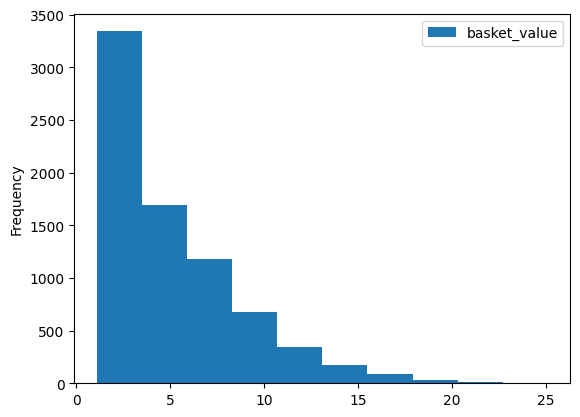

In [66]:
groceries_data.plot(kind='hist', y='basket_value')

Similarly, we see the price variation of the number of days that have passed since the day of the transaction. 
We observe that the majority of transactions occur in less than 10 days, and at the same time in more than 70 days.

In these intervals, therefore, we had an increase in customers.

In the meantime, the number of co-customers becomes stable.

<Axes: ylabel='Frequency'>

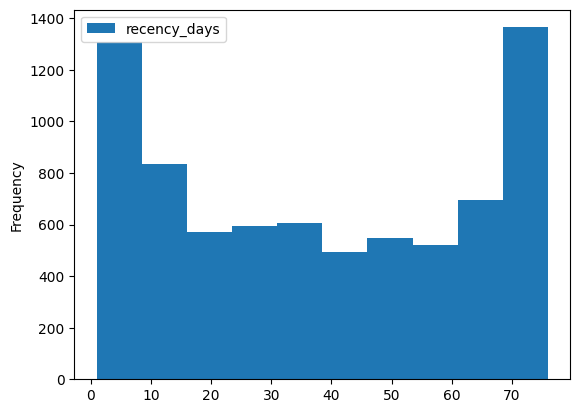

In [67]:
groceries_data.plot(kind='hist',y='recency_days')

<Axes: xlabel='basket_value', ylabel='recency_days'>

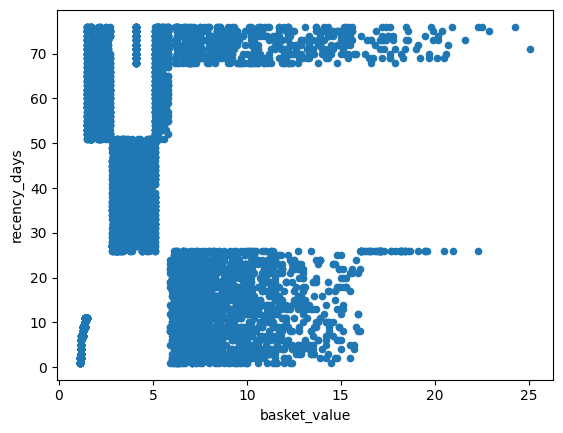

In [68]:
groceries_data.plot(kind='scatter', x='basket_value',y='recency_days')

Create list of transactions

In [69]:
transacts = []
transactions_data = groceries_data.loc[:, groceries_data.columns.drop(['id','basket_value','recency_days'])]
for i in range(0, 7536):
  #Populating a list of transactions
  transacts.append([str(transactions_data.values[i,j]) for j in range(0, 32)])

Keep needed transactions




In [70]:
desired_items = ['citrus fruit', 'tropical fruit', 'whole milk', 'other vegetables', 'rolls/buns', 'chocolate', 'bottled water', 'yogurt', 'sausage', 'root vegetables', 'pastry', 'soda', 'cream']
filtered_items = [[item for item in purchase if item in desired_items] for purchase in transacts]

Convert transactions to binary format

In [71]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
transaction_binary = te.fit(filtered_items).transform(filtered_items)
transaction_binary=transaction_binary.astype("int")
transaction_binary=pd.DataFrame(transaction_binary, columns=te.columns_)

Create basket categories

In [72]:
transaction_binary['basket_value_category']=pd.qcut(groceries_data['basket_value'], 3, labels=['low_value_basket','medium_value_basket','high_value_basket'])
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt,basket_value_category
0,0,0,1,0,0,0,0,0,0,0,0,0,0,low_value_basket
1,0,0,0,0,0,0,0,0,0,0,1,0,1,medium_value_basket
2,0,0,0,0,0,0,0,0,0,0,0,1,0,low_value_basket
3,0,0,0,0,0,0,0,0,0,0,0,0,1,high_value_basket
4,0,0,0,0,1,0,0,0,0,0,0,1,0,low_value_basket


# Learning association rules with the Apriori method

Run the algorithm for the products

In [73]:
from apyori import apriori
print('min_support=0.001, Number of rules:', len(list(apriori(filtered_items, min_support=0.001))))
print('min_support=0.005, Number of rules:', len(list(apriori(filtered_items, min_support=0.005))))
print('min_support=0.01,  Number of rules:', len(list(apriori(filtered_items, min_support=0.01))))
print('min_support=0.05,  Number of rules:', len(list(apriori(filtered_items, min_support=0.05))))
print('min_support=0.1,   Number of rules:', len(list(apriori(filtered_items, min_support=0.1))))
print('min_support=0.5,   Number of rules:', len(list(apriori(filtered_items, min_support=0.5))))
print('min_support=1,     Number of rules:', len(list(apriori(filtered_items, min_support=1))))

min_support=0.001, Number of rules: 758
min_support=0.005, Number of rules: 230
min_support=0.01,  Number of rules: 124
min_support=0.05,  Number of rules: 22
min_support=0.1,   Number of rules: 11
min_support=0.5,   Number of rules: 0
min_support=1,     Number of rules: 0


In [74]:
results = list(apriori(filtered_items, min_support=0.01, min_lift=1.11))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]} with Confidence: {rule.confidence:.2f}')

['other vegetables', 'root vegetables', 'yogurt'] -> ['whole milk'] with Confidence: 0.61
['citrus fruit', 'root vegetables'] -> ['other vegetables'] with Confidence: 0.59
['tropical fruit', 'root vegetables'] -> ['other vegetables'] with Confidence: 0.58
['tropical fruit', 'root vegetables'] -> ['whole milk'] with Confidence: 0.57
['root vegetables', 'yogurt'] -> ['whole milk'] with Confidence: 0.56
['whole milk', 'root vegetables', 'yogurt'] -> ['other vegetables'] with Confidence: 0.54
['rolls/buns', 'root vegetables'] -> ['whole milk'] with Confidence: 0.52
['tropical fruit', 'yogurt'] -> ['whole milk'] with Confidence: 0.52
['citrus fruit', 'root vegetables'] -> ['whole milk'] with Confidence: 0.52
['pastry', 'yogurt'] -> ['whole milk'] with Confidence: 0.52
['sausage', 'root vegetables'] -> ['whole milk'] with Confidence: 0.52
['other vegetables', 'yogurt'] -> ['whole milk'] with Confidence: 0.51
['rolls/buns', 'root vegetables'] -> ['other vegetables'] with Confidence: 0.50
['ro

We create the product list and with the calibrated basket value and run for the products and
calibrated basket value

In [75]:
import copy
filtered_items_bc = copy.deepcopy(filtered_items)
for i in range(0, 7536):
  #Populating a list of transactions
  filtered_items_bc[i].append(transaction_binary['basket_value_category'][i])

print('min_support=0.002, Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.002))))
print('min_support=0.006, Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.006))))
print('min_support=0.03,  Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.03))))
print('min_support=0.08,  Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.08))))
print('min_support=0.12,   Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.12))))
print('min_support=0.5,   Number of rules:', len(list(apriori(filtered_items_bc, min_support=0.5))))
print('min_support=1,     Number of rules:', len(list(apriori(filtered_items_bc, min_support=1))))

min_support=0.002, Number of rules: 1001
min_support=0.006, Number of rules: 442
min_support=0.03,  Number of rules: 91
min_support=0.08,  Number of rules: 24
min_support=0.12,   Number of rules: 14
min_support=0.5,   Number of rules: 0
min_support=1,     Number of rules: 0


We see that sausage is the first in confidence and is always combined with high_value_basket. Therefore, I think this is probably the most expensive product.

In [76]:
results = list(apriori(filtered_items_bc, min_support=0.03, min_lift=1.11))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]} with Confidence: {rule.confidence:.2f}')

['other vegetables', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['rolls/buns', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['soda', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['whole milk', 'sausage'] -> ['high_value_basket'] with Confidence: 1.00
['sausage'] -> ['high_value_basket'] with Confidence: 0.88
['pastry', 'whole milk'] -> ['high_value_basket'] with Confidence: 0.84
['tropical fruit', 'yogurt'] -> ['high_value_basket'] with Confidence: 0.80
['tropical fruit', 'whole milk'] -> ['high_value_basket'] with Confidence: 0.77
['other vegetables', 'tropical fruit'] -> ['high_value_basket'] with Confidence: 0.76
['rolls/buns', 'yogurt'] -> ['high_value_basket'] with Confidence: 0.76
['other vegetables', 'yogurt'] -> ['high_value_basket'] with Confidence: 0.73
['other vegetables', 'rolls/buns'] -> ['high_value_basket'] with Confidence: 0.73
['other vegetables', 'soda'] -> ['high_value_basket'] with Confidence: 0.71
['other vegetables', 'root 

#  Grouping of transactions using the k-means method


We add basket_value and recency_days to our processed data

In [77]:
transaction_binary['basket_value']=groceries_data['basket_value']
transaction_binary['recency_days']=groceries_data['recency_days']
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt,basket_value_category,basket_value,recency_days
0,0,0,1,0,0,0,0,0,0,0,0,0,0,low_value_basket,1.1,2
1,0,0,0,0,0,0,0,0,0,0,1,0,1,medium_value_basket,3.6,31
2,0,0,0,0,0,0,0,0,0,0,0,1,0,low_value_basket,1.2,7
3,0,0,0,0,0,0,0,0,0,0,0,0,1,high_value_basket,6.6,7
4,0,0,0,0,1,0,0,0,0,0,0,1,0,low_value_basket,2.5,66


Apply clustering k-means algorithm

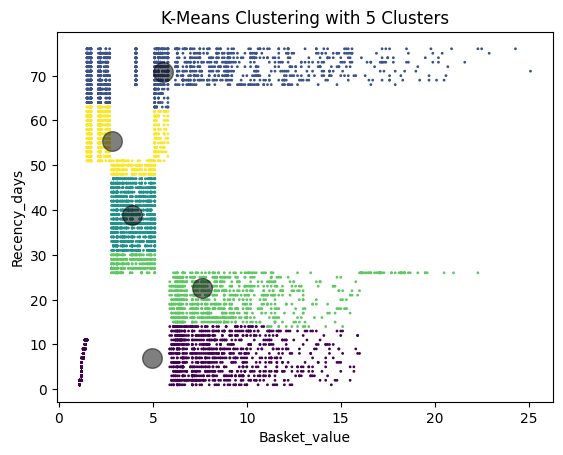

In [78]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
X=transaction_binary[['basket_value', 'recency_days']]
kmeans = KMeans(n_clusters=5)
y = kmeans.fit_predict(X)
transaction_binary['cluster'] = y

plt.scatter(transaction_binary['basket_value'], transaction_binary['recency_days'], c=y, s=1, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Basket_value')
plt.ylabel('Recency_days')
plt.title('K-Means Clustering with 5 Clusters')
plt.show()

In [79]:
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt,basket_value_category,basket_value,recency_days,cluster
0,0,0,1,0,0,0,0,0,0,0,0,0,0,low_value_basket,1.1,2,0
1,0,0,0,0,0,0,0,0,0,0,1,0,1,medium_value_basket,3.6,31,2
2,0,0,0,0,0,0,0,0,0,0,0,1,0,low_value_basket,1.2,7,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,high_value_basket,6.6,7,0
4,0,0,0,0,1,0,0,0,0,0,0,1,0,low_value_basket,2.5,66,1


In [80]:
# Select only the "basket value" and "recency days" columns
transaction_binary_subset = transaction_binary[["basket_value", "recency_days"]]

# Calculate the mean of each feature for each cluster
cluster_means = transaction_binary_subset.groupby(transaction_binary['cluster']).mean()
cluster_std = transaction_binary_subset.groupby(transaction_binary['cluster']).std()
cluster_count = transaction_binary_subset.groupby(transaction_binary['cluster']).count()

# Print statistics for each cluster (including mean and std for basket value and recency days)
for i in range(5):
    print(f"Cluster {i}:")
    print(f"Count={cluster_count.iloc[i][0]}")
    print(f"Mean (basket_value, recency_days)={tuple(cluster_means.iloc[i])}")
    print(f"Std (basket_value, recency_days)={tuple(cluster_std.iloc[i])}")
    print("-------------------------------")

Cluster 0:
Count=2059
Mean (basket_value, recency_days)=(4.929674599320059, 6.93200582807188)
Std (basket_value, recency_days)=(4.043157417875882, 3.5511314951690434)
-------------------------------
Cluster 1:
Count=1854
Mean (basket_value, recency_days)=(5.532038834951456, 70.78586839266451)
Std (basket_value, recency_days)=(4.296731076714461, 3.405971530699766)
-------------------------------
Cluster 2:
Count=1222
Mean (basket_value, recency_days)=(3.879050736497545, 38.808510638297875)
Std (basket_value, recency_days)=(0.748902390312978, 4.809149712548798)
-------------------------------
Cluster 3:
Count=1252
Mean (basket_value, recency_days)=(7.646645367412141, 22.630191693290733)
Std (basket_value, recency_days)=(3.575231866902175, 4.616359429646699)
-------------------------------
Cluster 4:
Count=1149
Mean (basket_value, recency_days)=(2.8157528285465623, 55.440382941688426)
Std (basket_value, recency_days)=(1.2775346718613005, 4.545086391499024)
-------------------------------


/tmp/ipykernel_16290/603196878.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Count={cluster_count.iloc[i][0]}")


Group 0 --> “Group of old transactions of **large** value that
represents 24% of all transactions”

Group 1 --> “Group of recent transactions of **large** value that
represents 27% of all transactions”

Group 2 -- > “Group of old transactions of **moderate** value that
represents 16% of all transactions”

Group 3 --> “Group of recent transactions of **large** value that
represents 16% of all transactions”

Group 0 should be of concern to the marketing department. They need to get involved.

Conversion to binary format

In [81]:
for i in range(5):
  temp_list = []
  for k in transaction_binary['cluster']:
    if i == k:
      val = 1
    else:
      val = 0
    temp_list.append(val)
  transaction_binary[f'Cluster{i}'] = temp_list

In [82]:
transaction_binary.head()

,bottled water,chocolate,citrus fruit,cream,other vegetables,pastry,rolls/buns,root vegetables,sausage,soda,...,yogurt,basket_value_category,basket_value,recency_days,cluster,Cluster0,Cluster1,Cluster2,Cluster3,Cluster4
0,0,0,1,0,0,0,0,0,0,0,...,0,low_value_basket,1.1,2,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,medium_value_basket,3.6,31,2,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,low_value_basket,1.2,7,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,high_value_basket,6.6,7,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,low_value_basket,2.5,66,1,0,1,0,0,0


# Combined use of methods: description of product and general group profiles using correlation rules


We create two lists.
One with products and transaction groups.
One with products, the groups of
transactions and the discretized basket value.

In [83]:
import copy
filtered_items_cl = copy.deepcopy(filtered_items)
for i in range(0, 7536):
  #Populating a list of transactions
  filtered_items_cl[i].append(str(transaction_binary['cluster'][i]))

filtered_items_bc_cl = copy.deepcopy(filtered_items_cl)
for i in range(0, 7536):
  #Populating a list of transactions
  filtered_items_bc_cl[i].append(transaction_binary['basket_value_category'][i])

filtered_items_cl[1]

['tropical fruit', 'yogurt', '2']

We find the 20 rules with the highest confidence exclusively
for products and groups of transactions

In [84]:
results = list(apriori(filtered_items_cl, min_support=0.037, min_lift=1))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]}, with Confidence: {rule.confidence:.2f}')

['pastry'] -> ['1'], with Confidence: 1.00
['pastry', 'whole milk'] -> ['1'], with Confidence: 1.00
['whole milk', '1'] -> ['pastry'], with Confidence: 0.68
['1'] -> ['pastry'], with Confidence: 0.47
['root vegetables'] -> ['whole milk'], with Confidence: 0.45
['root vegetables'] -> ['other vegetables'], with Confidence: 0.43
['0'] -> ['whole milk'], with Confidence: 0.43
['3'] -> ['whole milk'], with Confidence: 0.42
['tropical fruit'] -> ['whole milk'], with Confidence: 0.40
['yogurt'] -> ['whole milk'], with Confidence: 0.40
['sausage'] -> ['3'], with Confidence: 0.39
['other vegetables'] -> ['whole milk'], with Confidence: 0.39
['pastry'] -> ['whole milk'], with Confidence: 0.37
['pastry'] -> ['whole milk', '1'], with Confidence: 0.37
['pastry', '1'] -> ['whole milk'], with Confidence: 0.37
['bottled water'] -> ['0'], with Confidence: 0.37
['citrus fruit'] -> ['whole milk'], with Confidence: 0.37
['sausage'] -> ['0'], with Confidence: 0.37
['whole milk'] -> ['0'], with Confidence: 

Pastry is quite related to group 0.

Whole_milk is quite related to group 1.

The combination [‘whole milk’, ‘pastry’] is very much bought by group 0.
This should worry the marketing department, and is related to the pastry product. Its quality may have been deteriorating all this time, hence its reduced appearance in transactions.

We find the 20 rules with the highest confidence for products, groups of transactions and discretised basket value

In [85]:
results = list(apriori(filtered_items_bc_cl, min_support=0.037, min_lift=1))

rules = []
for result in results:
    rules += result.ordered_statistics

def get_confidence(rule):
  return rule.confidence

ordered = sorted(rules, key=get_confidence, reverse=True)
for rule in ordered[:20]:
  print(f'{[*rule.items_base]} -> {[*rule.items_add]}, with Confidence: {rule.confidence:.2f}')

['pastry'] -> ['1'], with Confidence: 1.00
['2'] -> ['medium_value_basket'], with Confidence: 1.00
['rolls/buns', '0'] -> ['high_value_basket'], with Confidence: 1.00
['sausage', '0'] -> ['high_value_basket'], with Confidence: 1.00
['high_value_basket', '1'] -> ['pastry'], with Confidence: 1.00
['pastry', 'high_value_basket'] -> ['1'], with Confidence: 1.00
['pastry', 'medium_value_basket'] -> ['1'], with Confidence: 1.00
['pastry', 'whole milk'] -> ['1'], with Confidence: 1.00
['rolls/buns', '2'] -> ['medium_value_basket'], with Confidence: 1.00
['soda', '2'] -> ['medium_value_basket'], with Confidence: 1.00
['whole milk', '2'] -> ['medium_value_basket'], with Confidence: 1.00
['rolls/buns', 'sausage'] -> ['high_value_basket'], with Confidence: 1.00
['whole milk', 'sausage'] -> ['high_value_basket'], with Confidence: 1.00
['3', 'sausage'] -> ['high_value_basket'], with Confidence: 0.96
['0', 'yogurt'] -> ['high_value_basket'], with Confidence: 0.92
['sausage'] -> ['high_value_basket']

We observe from the rule [‘2’] -&gt; [‘medium_value_basket’] that all trades in group 2 are of medium value.

[‘sausage’, ‘3’] -&gt; [‘high_value_basket’] shows us that sausage has a high cost and is in group 3. Similarly, for ['3', 'yogurt'] -> ['high_value_basket'].